In [1]:
from collab_v1.data_higgs import load_data, download_and_make_data
import pandas as pd
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from solution import get_training_data, train_catboost, train_dnn, draw_loss, roc_plots, normal_model, overfitting_model, simple_model, multilayer_model, catboost_model, create_histogram
import numpy

2025-07-22 15:05:45.293251: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753189545.371916   11170 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753189545.390841   11170 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753189545.503520   11170 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753189545.503542   11170 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753189545.503544   11170 computation_placer.cc:177] computation placer alr

In [2]:
download_and_make_data()
dataset = load_data()
X_train, y_train, X_val, y_val = get_training_data(dataset)
print(X_train.head())
print("SHAPE", X_train.shape, X_val.shape)
dataset.close()

Making higgs pickle...
data_dir already has the downloaded data file: higgs_csv/HIGGS.csv.gz
Data input : higgs_csv/HIGGS.csv.gz
Data processing... taking multiple minutes...
Read variables: Index(['hlabel', 'lepton-pT', 'lepton-eta', 'lepton-phi', 'missing-energy',
       'missing-energy-phi', 'jet_1-pt', 'jet_1-eta', 'jet_1-phi',
       'jet_1-b-tag', 'jet_2-pt', 'jet_2-eta', 'jet_2-phi', 'jet_2-b-tag',
       'jet_3-pt', 'jet_3-eta', 'jet_3-phi', 'jet_3-b-tag', 'jet_4-pt',
       'jet_4-eta', 'jet_4-phi', 'jet_4-b-tag', 'm_jj', 'm_jjj', 'm_lv',
       'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'],
      dtype='object')
Dataset shape : (11000000, 29)
Selected variables: ['lepton-pT', 'lepton-eta', 'lepton-phi', 'missing-energy', 'missing-energy-phi', 'jet_1-pt', 'jet_1-eta', 'jet_1-phi', 'jet_1-b-tag', 'jet_2-pt', 'jet_2-eta', 'jet_2-phi', 'jet_2-b-tag', 'jet_3-pt', 'jet_3-eta', 'jet_3-phi', 'jet_3-b-tag', 'jet_4-pt', 'jet_4-eta', 'jet_4-phi', 'jet_4-b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', '

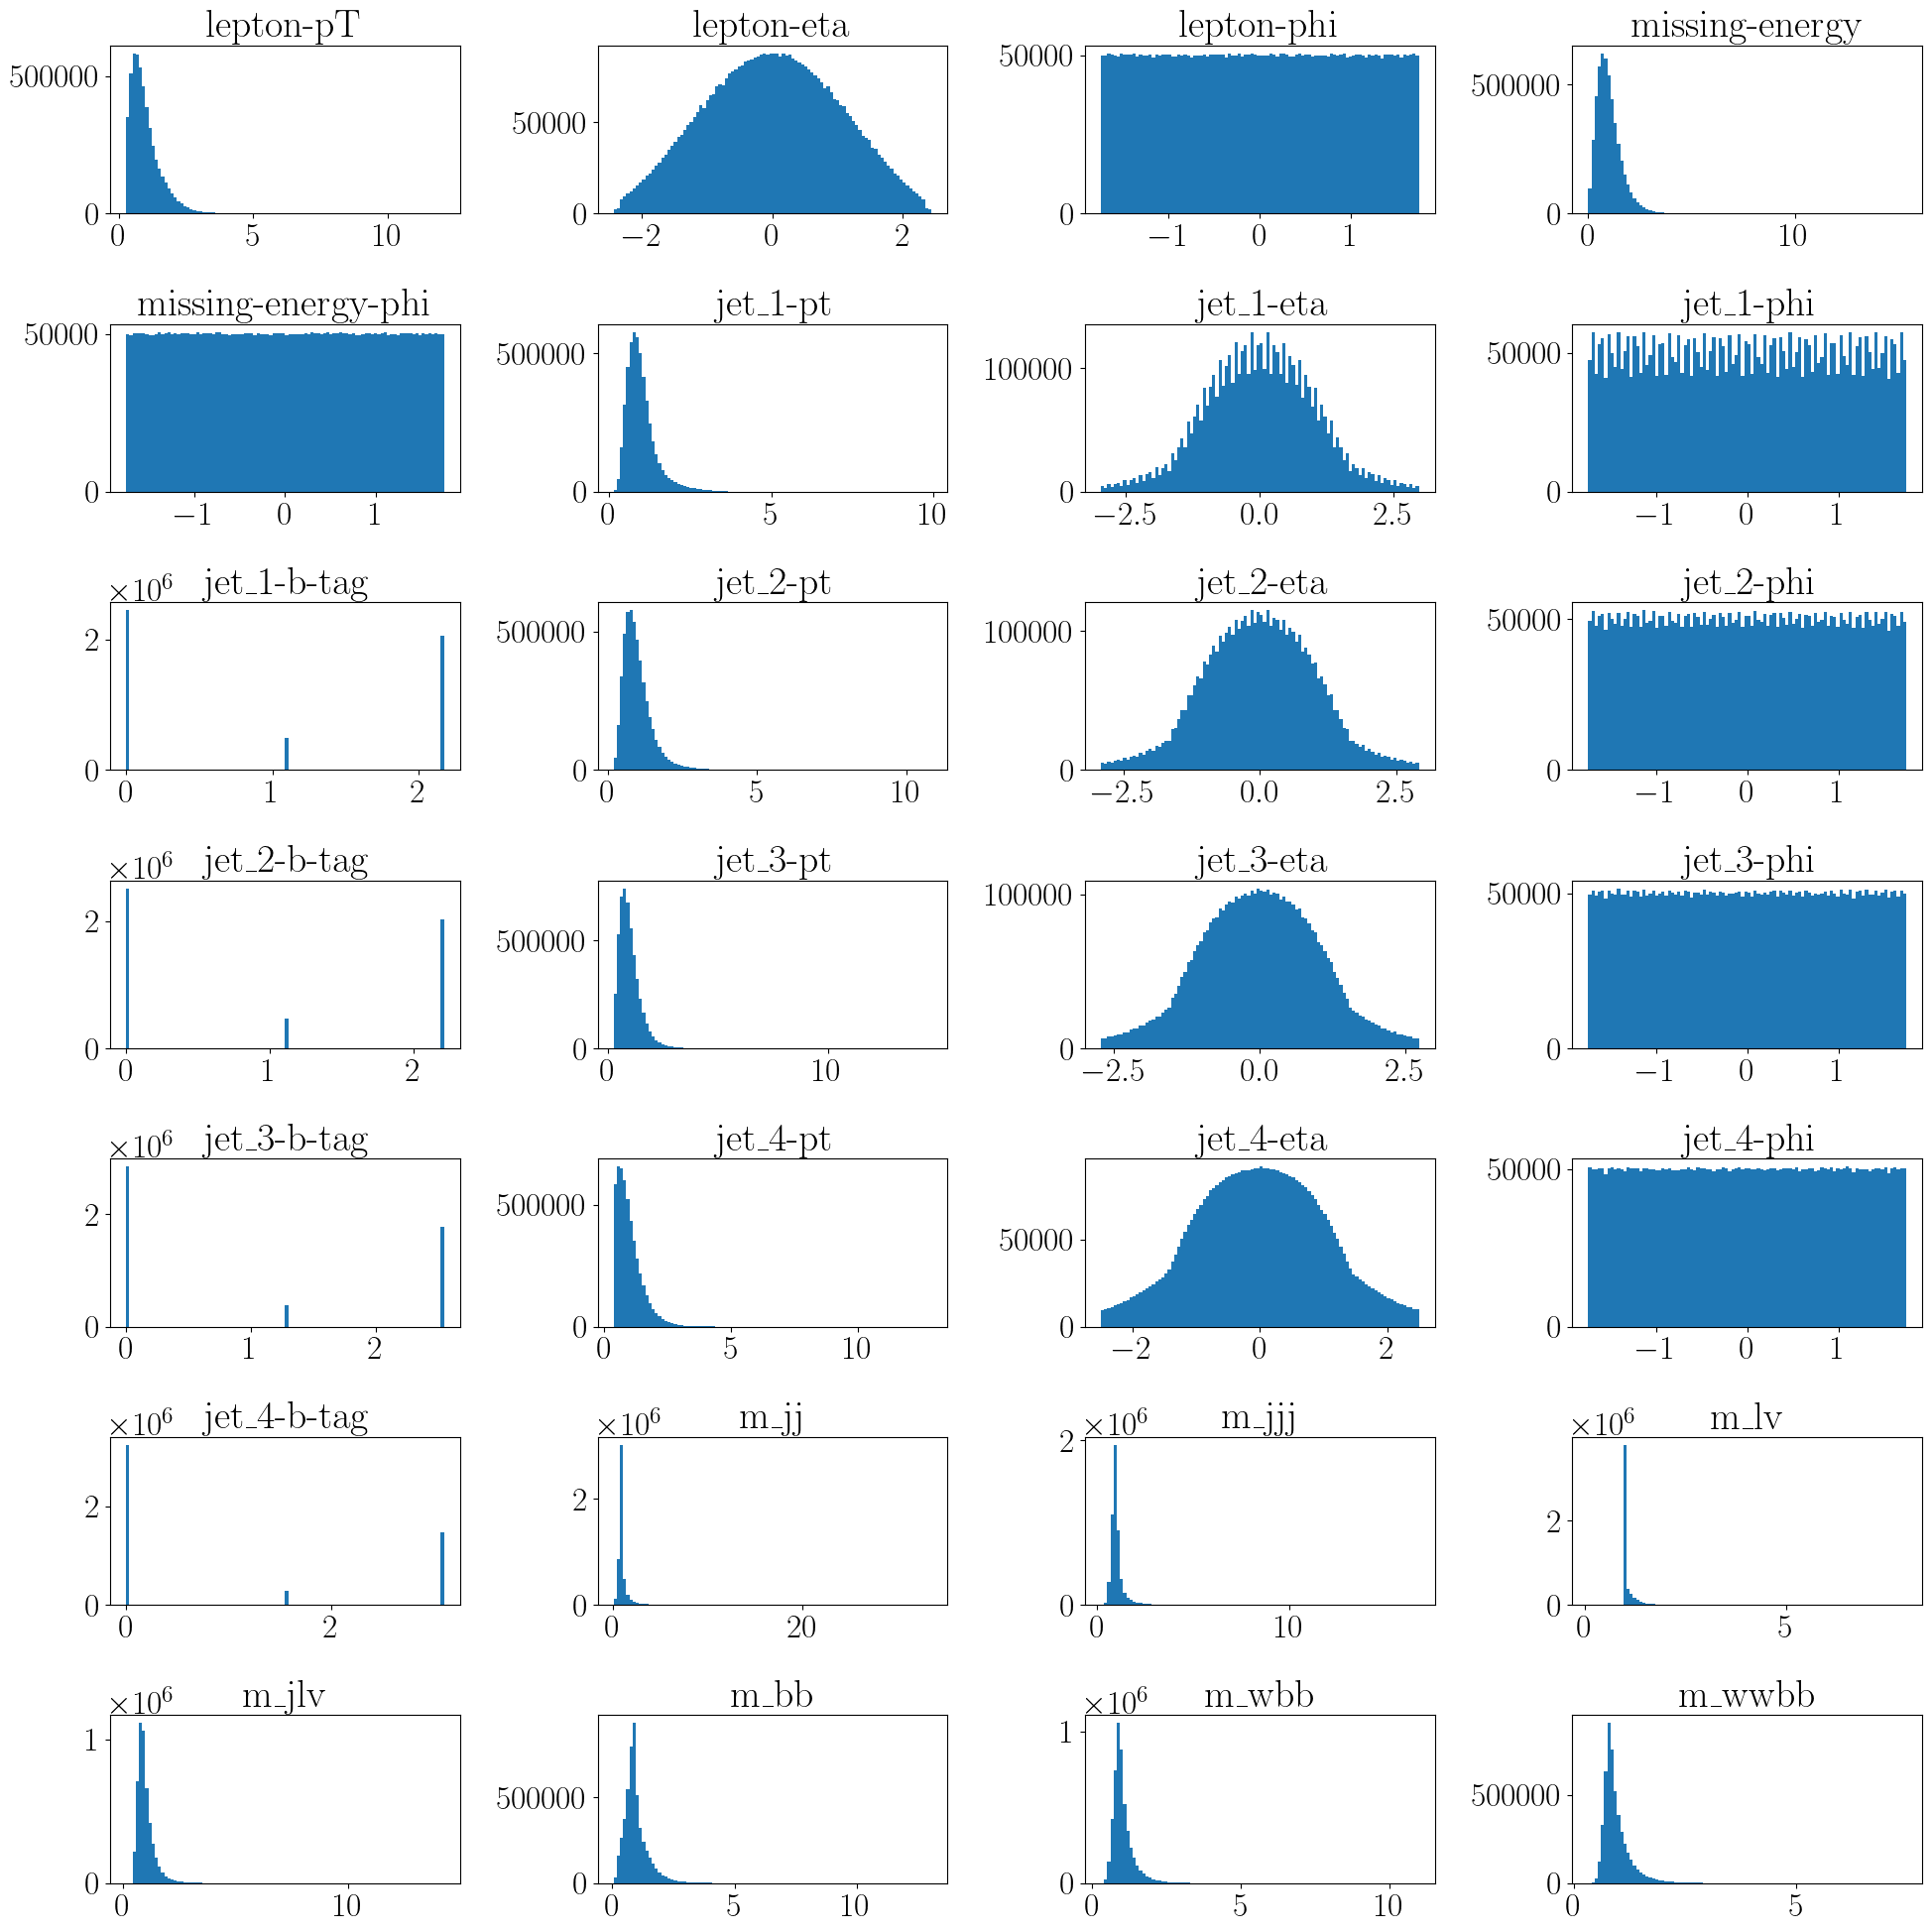

In [3]:
create_histogram(X_train)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train.corr()
annot_labels = correlation_matrix.map(lambda x: f'{x:.1f}'.replace('-0.0', '0.0'))

plt.rcParams['font.size'] = 33
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=annot_labels, cmap='coolwarm', fmt='')
plt.savefig("images/correlation.pdf")

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
overfitting = overfitting_model((X_train.shape[1],))
overfitted_history = train_dnn(overfitting, X_train, y_train, X_val, y_val, epochs=40, batch_size=1000)
y_overfitting = overfitting.predict(X_val)

tf.keras.backend.clear_session()

In [ ]:
simple = simple_model((X_train.shape[1],))
simple_history = train_dnn(simple, X_train, y_train, X_val, y_val, epochs=40)
y_simple = simple.predict(X_val)

tf.keras.backend.clear_session()

In [ ]:
normal = normal_model((X_train.shape[1],))
normal_history = train_dnn(normal, X_train, y_train, X_val, y_val, epochs=40)
y_normal = normal.predict(X_val)

tf.keras.backend.clear_session()

I0000 00:00:1751566512.714374    7268 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2144 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/40


I0000 00:00:1751566514.292887    9204 service.cc:152] XLA service 0x7f8ca000e620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751566514.292901    9204 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-07-03 20:15:14.320198: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751566514.505826    9204 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1751566515.493282    9204 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-07-03 20:15:18.600132: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_86', 4 bytes spill stores, 4 bytes spill loads

2025-07-03 20:15:18.852985: I 

2000/2000 - 7s - 3ms/step - accuracy: 0.6832 - auc: 0.7487 - loss: 0.5903 - val_accuracy: 0.7175 - val_auc: 0.7927 - val_loss: 0.5505
Epoch 2/40
2000/2000 - 3s - 2ms/step - accuracy: 0.7132 - auc: 0.7886 - loss: 0.5525 - val_accuracy: 0.7304 - val_auc: 0.8079 - val_loss: 0.5314
Epoch 3/40
2000/2000 - 3s - 2ms/step - accuracy: 0.7219 - auc: 0.7984 - loss: 0.5415 - val_accuracy: 0.7332 - val_auc: 0.8130 - val_loss: 0.5257
Epoch 4/40
2000/2000 - 3s - 2ms/step - accuracy: 0.7256 - auc: 0.8028 - loss: 0.5364 - val_accuracy: 0.7371 - val_auc: 0.8177 - val_loss: 0.5197
Epoch 5/40
2000/2000 - 3s - 1ms/step - accuracy: 0.7280 - auc: 0.8062 - loss: 0.5323 - val_accuracy: 0.7390 - val_auc: 0.8189 - val_loss: 0.5180
Epoch 6/40
2000/2000 - 3s - 1ms/step - accuracy: 0.7297 - auc: 0.8086 - loss: 0.5297 - val_accuracy: 0.7401 - val_auc: 0.8210 - val_loss: 0.5148
Epoch 7/40
2000/2000 - 3s - 1ms/step - accuracy: 0.7314 - auc: 0.8108 - loss: 0.5271 - val_accuracy: 0.7409 - val_auc: 0.8224 - val_loss: 0.5

2025-07-03 20:17:20.477940: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_53', 8 bytes spill stores, 8 bytes spill loads



6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 567us/step


In [ ]:
cb = catboost_model()
cb_history = train_catboost(cb, X_train, y_train, X_val, y_val)
y_cb = cb.predict(X_val, prediction_type="Probability")[:, 1]


Learning rate set to 0.042791
0:	learn: 0.6860452	test: 0.6860400	best: 0.6860400 (0)	total: 62.6ms	remaining: 1m 2s
100:	learn: 0.5626291	test: 0.5629716	best: 0.5629716 (100)	total: 822ms	remaining: 7.31s
200:	learn: 0.5452254	test: 0.5463201	best: 0.5463201 (200)	total: 1.59s	remaining: 6.31s
300:	learn: 0.5366058	test: 0.5385155	best: 0.5385155 (300)	total: 2.34s	remaining: 5.43s
400:	learn: 0.5302152	test: 0.5329389	best: 0.5329389 (400)	total: 3.1s	remaining: 4.62s
500:	learn: 0.5256486	test: 0.5292278	best: 0.5292278 (500)	total: 3.85s	remaining: 3.84s
600:	learn: 0.5218199	test: 0.5262418	best: 0.5262418 (600)	total: 4.62s	remaining: 3.06s
700:	learn: 0.5186766	test: 0.5239598	best: 0.5239598 (700)	total: 5.38s	remaining: 2.29s
800:	learn: 0.5158965	test: 0.5219687	best: 0.5219687 (800)	total: 6.13s	remaining: 1.52s
900:	learn: 0.5135890	test: 0.5205081	best: 0.5205081 (900)	total: 6.89s	remaining: 757ms
999:	learn: 0.5115054	test: 0.5191885	best: 0.5191885 (999)	total: 7.65s	r

In [ ]:
dot = cb.plot_tree(tree_idx=0)
dot.render("images/tree")

'images/tree.pdf'

In [ ]:

def multilayer_model(shape):
    l2 = tf.keras.regularizers.l2(1e-5)

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Dense(300, use_bias=False, kernel_regularizer=l2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dense(300, use_bias=False, kernel_regularizer=l2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dense(300, use_bias=False, kernel_regularizer=l2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dense(300, use_bias=False, kernel_regularizer=l2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dense(300, use_bias=False, kernel_regularizer=l2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["auc", "accuracy"])

    return model


multilayer = multilayer_model((X_train.shape[1],))
multilayer_history = train_dnn(multilayer, X_train, y_train, X_val, y_val, epochs=40)
y_multilayer = multilayer.predict(X_val)

In [ ]:
normal.summary()

In [ ]:
def draw_loss(history, title=""):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(loss, label="training loss")
    ax.plot(val_loss, label="validation loss")
    ax.set_title(title)
    ax.set_xlabel("epochs")
    ax.set_ylabel("loss")
    ax.legend()

plt.rcParams['font.size'] = 33
draw_loss(overfitted_history)
plt.savefig("images/overfittingloss.pdf")

draw_loss(normal_history)
plt.savefig("images/normalloss.pdf")
draw_loss(simple_history)

In [ ]:
roc_auc_score(y_val, y_normal)

In [ ]:
roc_plots(y_val, (y_simple, "NN"), (y_cb, "CatBoost"))
plt.savefig("images/roc.pdf")

In [ ]:

def feature_selection(features):
    new_feature_list = []
    for feature in features:
        X_train_selection = X_train[feature]
        X_val_selection = X_val[feature]
        
        normal = normal_model((len(X_train_selection.columns),))
        normal_history = train_dnn(normal, X_train_selection, y_train, X_val_selection, y_val, epochs=20, verbose=0, batch_size=2000)

        y_pred = normal.predict(X_val_selection)
        accuracy = accuracy_score(y_pred > 0.5, y_val)

        new_feature_list.append((accuracy, feature))
        print(feature, accuracy)
        tf.keras.backend.clear_session()
        
    return new_feature_list


In [ ]:
one_feature = [(0.54405, 'lepton-pT'), (0.53073, 'lepton-eta'), (0.52945, 'lepton-phi'), (0.551235, 'missing-energy'), (0.52945, 'missing-energy-phi'), (0.545885, 'jet_1-pt'), (0.52945, 'jet_1-eta'), (0.52945, 'jet_1-phi'), (0.52945, 'jet_1-b-tag'), (0.52945, 'jet_2-pt'), (0.52836, 'jet_2-eta'), (0.52945, 'jet_2-phi'), (0.524455, 'jet_2-b-tag'), (0.529445, 'jet_3-pt'), (0.528565, 'jet_3-eta'), (0.52945, 'jet_3-phi'), (0.52945, 'jet_3-b-tag'), (0.52945, 'jet_4-pt'), (0.530455, 'jet_4-eta'), (0.52945, 'jet_4-phi'), (0.52945, 'jet_4-b-tag'), (0.528465, 'm_jj'), (0.57561, 'm_jjj'), (0.52972, 'm_lv'), (0.56803, 'm_jlv'), (0.633965, 'm_bb'), (0.587715, 'm_wbb'), (0.58672, 'm_wwbb')]
two_features = [(0.64862, ['m_bb', 'm_jjj']), (0.6485, ['m_bb', 'm_wbb']), (0.64808, ['m_bb', 'm_jlv']), (0.644725, ['m_bb', 'm_wwbb']), (0.64447, ['m_bb', 'jet_1-pt']), (0.637995, ['m_bb', 'missing-energy']), (0.6379, ['m_bb', 'lepton-pT']), (0.6197, ['m_wwbb', 'm_jjj']), (0.6164, ['m_wbb', 'm_jjj']), (0.611765, ['m_wwbb', 'm_jlv']), (0.611125, ['m_wbb', 'm_wwbb']), (0.60845, ['m_wbb', 'm_jlv']), (0.605735, ['m_wwbb', 'jet_1-pt']), (0.604305, ['m_wbb', 'jet_1-pt']), (0.59686, ['m_jjj', 'm_jlv']), (0.592825, ['m_wbb', 'missing-energy']), (0.591855, ['m_wbb', 'lepton-pT']), (0.591375, ['m_wwbb', 'lepton-pT']), (0.58652, ['m_wwbb', 'missing-energy']), (0.58588, ['m_jjj', 'missing-energy']), (0.585195, ['m_jjj', 'lepton-pT']), (0.58261, ['m_jjj', 'jet_1-pt']), (0.57567, ['m_jlv', 'missing-energy']), (0.5753, ['m_jlv', 'lepton-pT']), (0.57464, ['m_jlv', 'jet_1-pt']), (0.565885, ['missing-energy', 'lepton-pT']), (0.565285, ['missing-energy', 'jet_1-pt']), (0.561235, ['jet_1-pt', 'lepton-pT'])]
three_features = [(0.667735, ['m_bb', 'm_wbb', 'm_wwbb']), (0.666655, ['m_bb', 'm_wbb', 'm_jjj']), (0.66603, ['m_bb', 'm_wwbb', 'jet_1-pt']), (0.66495, ['m_bb', 'm_wbb', 'm_jlv']), (0.664925, ['m_bb', 'm_wbb', 'jet_1-pt']), (0.664305, ['m_bb', 'm_wwbb', 'm_jjj']), (0.66049, ['m_bb', 'm_wwbb', 'm_jlv']), (0.660465, ['m_bb', 'm_jjj', 'm_jlv']), (0.65906, ['m_bb', 'm_jlv', 'jet_1-pt']), (0.658715, ['m_bb', 'm_jjj', 'jet_1-pt']), (0.6566, ['m_bb', 'm_wbb', 'missing-energy']), (0.655685, ['m_bb', 'm_wbb', 'lepton-pT']), (0.65374, ['m_bb', 'm_jjj', 'lepton-pT']), (0.65361, ['m_bb', 'missing-energy', 'jet_1-pt']), (0.653585, ['m_bb', 'jet_1-pt', 'lepton-pT']), (0.65262, ['m_bb', 'm_jlv', 'missing-energy']), (0.65246, ['m_bb', 'm_jjj', 'missing-energy']), (0.65158, ['m_bb', 'm_jlv', 'lepton-pT']), (0.64823, ['m_bb', 'm_wwbb', 'lepton-pT']), (0.64688, ['m_bb', 'm_wwbb', 'missing-energy']), (0.642775, ['m_bb', 'missing-energy', 'lepton-pT']), (0.64063, ['m_wwbb', 'm_jjj', 'm_jlv']), (0.64018, ['m_wbb', 'm_wwbb', 'm_jjj']), (0.63791, ['m_wwbb', 'm_jjj', 'jet_1-pt']), (0.63431, ['m_wbb', 'm_jjj', 'm_jlv']), (0.632585, ['m_wbb', 'm_wwbb', 'jet_1-pt']), (0.632485, ['m_wbb', 'm_wwbb', 'm_jlv']), (0.62834, ['m_wbb', 'm_jjj', 'jet_1-pt']), (0.62758, ['m_wwbb', 'm_jlv', 'jet_1-pt']), (0.625785, ['m_wwbb', 'm_jjj', 'lepton-pT']), (0.622815, ['m_wbb', 'm_jjj', 'missing-energy']), (0.62211, ['m_wwbb', 'm_jjj', 'missing-energy']), (0.6217, ['m_wbb', 'm_jjj', 'lepton-pT']), (0.62004, ['m_wbb', 'm_jlv', 'jet_1-pt']), (0.61892, ['m_wwbb', 'm_jlv', 'lepton-pT']), (0.616395, ['m_wbb', 'm_wwbb', 'lepton-pT']), (0.61583, ['m_wbb', 'm_jlv', 'missing-energy']), (0.615745, ['m_wwbb', 'm_jlv', 'missing-energy']), (0.614035, ['m_wbb', 'm_jlv', 'lepton-pT']), (0.61357, ['m_wbb', 'm_wwbb', 'missing-energy']), (0.61306, ['m_wwbb', 'jet_1-pt', 'lepton-pT']), (0.61168, ['m_wbb', 'missing-energy', 'jet_1-pt']), (0.611655, ['m_wbb', 'jet_1-pt', 'lepton-pT']), (0.60983, ['m_wwbb', 'missing-energy', 'jet_1-pt']), (0.60683, ['m_jjj', 'm_jlv', 'jet_1-pt']), (0.606645, ['m_jjj', 'm_jlv', 'lepton-pT']), (0.606545, ['m_jjj', 'm_jlv', 'missing-energy']), (0.59908, ['m_wbb', 'missing-energy', 'lepton-pT']), (0.598225, ['m_wwbb', 'missing-energy', 'lepton-pT']), (0.59511, ['m_jjj', 'missing-energy', 'jet_1-pt']), (0.59509, ['m_jjj', 'missing-energy', 'lepton-pT']), (0.59448, ['m_jjj', 'jet_1-pt', 'lepton-pT']), (0.592125, ['m_jlv', 'jet_1-pt', 'lepton-pT']), (0.59136, ['m_jlv', 'missing-energy', 'lepton-pT']), (0.591135, ['m_jlv', 'missing-energy', 'jet_1-pt']), (0.584865, ['missing-energy', 'jet_1-pt', 'lepton-pT'])]
fourth = [(0.687115, ['m_bb', 'm_wbb', 'm_wwbb', 'jet_1-pt']), (0.68593, ['m_bb', 'm_wbb', 'm_wwbb', 'm_jlv']), (0.68563, ['m_bb', 'm_wbb', 'm_wwbb', 'm_jjj']), (0.68481, ['m_bb', 'm_wwbb', 'm_jjj', 'jet_1-pt']), (0.68186, ['m_bb', 'm_wwbb', 'm_jjj', 'm_jlv']), (0.67925, ['m_bb', 'm_wwbb', 'm_jlv', 'jet_1-pt']), (0.678915, ['m_bb', 'm_wbb', 'm_jjj', 'm_jlv']), (0.678525, ['m_bb', 'm_wbb', 'm_jjj', 'jet_1-pt']), (0.67778, ['m_bb', 'm_wbb', 'm_jlv', 'jet_1-pt']), (0.674695, ['m_bb', 'm_wbb', 'missing-energy', 'jet_1-pt']), (0.674285, ['m_bb', 'm_wbb', 'm_wwbb', 'lepton-pT']), (0.67375, ['m_bb', 'm_wbb', 'jet_1-pt', 'lepton-pT']), (0.67341, ['m_bb', 'm_wwbb', 'jet_1-pt', 'lepton-pT']), (0.67339, ['m_bb', 'm_jjj', 'm_jlv', 'jet_1-pt']), (0.673165, ['m_bb', 'm_wbb', 'm_jjj', 'lepton-pT']), (0.672835, ['m_bb', 'm_wbb', 'm_wwbb', 'missing-energy']), (0.672535, ['m_bb', 'm_wwbb', 'missing-energy', 'jet_1-pt']), (0.671735, ['m_bb', 'm_wwbb', 'm_jjj', 'lepton-pT']), (0.67116, ['m_bb', 'm_wbb', 'm_jjj', 'missing-energy']), (0.670675, ['m_bb', 'm_wbb', 'm_jlv', 'lepton-pT']), (0.67001, ['m_bb', 'm_wbb', 'm_jlv', 'missing-energy']), (0.66815, ['m_bb', 'm_jlv', 'missing-energy', 'jet_1-pt']), (0.66814, ['m_bb', 'm_jlv', 'jet_1-pt', 'lepton-pT']), (0.667565, ['m_bb', 'm_wwbb', 'm_jjj', 'missing-energy']), (0.66744, ['m_bb', 'm_wwbb', 'm_jlv', 'lepton-pT']), (0.66684, ['m_bb', 'm_jjj', 'm_jlv', 'lepton-pT']), (0.6664, ['m_bb', 'm_jjj', 'm_jlv', 'missing-energy']), (0.666165, ['m_bb', 'm_jjj', 'jet_1-pt', 'lepton-pT']), (0.665525, ['m_bb', 'm_jjj', 'missing-energy', 'jet_1-pt']), (0.664425, ['m_bb', 'missing-energy', 'jet_1-pt', 'lepton-pT']), (0.663245, ['m_bb', 'm_wbb', 'missing-energy', 'lepton-pT']), (0.66279, ['m_bb', 'm_wwbb', 'm_jlv', 'missing-energy']), (0.6594, ['m_bb', 'm_jjj', 'missing-energy', 'lepton-pT']), (0.658685, ['m_wbb', 'm_wwbb', 'm_jjj', 'm_jlv']), (0.65709, ['m_wwbb', 'm_jjj', 'm_jlv', 'jet_1-pt']), (0.65674, ['m_bb', 'm_jlv', 'missing-energy', 'lepton-pT']), (0.656535, ['m_wbb', 'm_wwbb', 'm_jjj', 'jet_1-pt']), (0.65518, ['m_bb', 'm_wwbb', 'missing-energy', 'lepton-pT']), (0.648745, ['m_wbb', 'm_wwbb', 'm_jlv', 'jet_1-pt']), (0.64797, ['m_wbb', 'm_jjj', 'm_jlv', 'jet_1-pt']), (0.647755, ['m_wwbb', 'm_jjj', 'm_jlv', 'lepton-pT']), (0.647645, ['m_wbb', 'm_wwbb', 'm_jjj', 'lepton-pT']), (0.64342, ['m_wbb', 'm_wwbb', 'm_jlv', 'lepton-pT']), (0.6431, ['m_wwbb', 'm_jjj', 'jet_1-pt', 'lepton-pT']), (0.642955, ['m_wwbb', 'm_jjj', 'm_jlv', 'missing-energy']), (0.64216, ['m_wbb', 'm_wwbb', 'm_jjj', 'missing-energy']), (0.64112, ['m_wwbb', 'm_jjj', 'missing-energy', 'jet_1-pt']), (0.64007, ['m_wbb', 'm_wwbb', 'jet_1-pt', 'lepton-pT']), (0.639935, ['m_wbb', 'm_jjj', 'm_jlv', 'lepton-pT']), (0.639825, ['m_wbb', 'm_jjj', 'm_jlv', 'missing-energy']), (0.638355, ['m_wbb', 'm_wwbb', 'm_jlv', 'missing-energy']), (0.63743, ['m_wbb', 'm_jjj', 'missing-energy', 'jet_1-pt']), (0.637215, ['m_wbb', 'm_jjj', 'jet_1-pt', 'lepton-pT']), (0.63613, ['m_wbb', 'm_wwbb', 'missing-energy', 'jet_1-pt']), (0.6359, ['m_wwbb', 'm_jlv', 'jet_1-pt', 'lepton-pT']), (0.63179, ['m_wwbb', 'm_jlv', 'missing-energy', 'jet_1-pt']), (0.62998, ['m_wwbb', 'm_jjj', 'missing-energy', 'lepton-pT']), (0.62976, ['m_wbb', 'm_jjj', 'missing-energy', 'lepton-pT']), (0.629285, ['m_wbb', 'm_jlv', 'jet_1-pt', 'lepton-pT']), (0.62905, ['m_wbb', 'm_jlv', 'missing-energy', 'jet_1-pt']), (0.62674, ['m_wwbb', 'm_jlv', 'missing-energy', 'lepton-pT']), (0.62593, ['m_wbb', 'm_wwbb', 'missing-energy', 'lepton-pT']), (0.622735, ['m_wbb', 'missing-energy', 'jet_1-pt', 'lepton-pT']), (0.622505, ['m_wbb', 'm_jlv', 'missing-energy', 'lepton-pT']), (0.62084, ['m_wwbb', 'missing-energy', 'jet_1-pt', 'lepton-pT']), (0.61804, ['m_jjj', 'm_jlv', 'jet_1-pt', 'lepton-pT']), (0.61597, ['m_jjj', 'm_jlv', 'missing-energy', 'jet_1-pt']), (0.614815, ['m_jjj', 'm_jlv', 'missing-energy', 'lepton-pT']), (0.6091, ['m_jjj', 'missing-energy', 'jet_1-pt', 'lepton-pT']), (0.605845, ['m_jlv', 'missing-energy', 'jet_1-pt', 'lepton-pT'])]
importances = {'lepton-pT': 0.03304295539855957, 'lepton-eta': 0.00884028673171997, 'lepton-phi': 0.0002063632011413574, 'missing-energy': 0.02587686777114868, 'missing-energy-phi': 0.00042734146118164065, 'jet_1-pt': 0.07538478374481201, 'jet_1-eta': 0.0051809906959533695, 'jet_1-phi': 0.00025473833084106446, 'jet_1-b-tag': 0.009272921085357665, 'jet_2-pt': 0.021140027046203613, 'jet_2-eta': 0.003143489360809326, 'jet_2-phi': 0.0005424380302429199, 'jet_2-b-tag': 0.006599164009094239, 'jet_3-pt': 0.004403126239776611, 'jet_3-eta': 0.002610588073730469, 'jet_3-phi': 0.00016547441482543944, 'jet_3-b-tag': 0.003815484046936035, 'jet_4-pt': 0.005669355392456055, 'jet_4-eta': 0.0019988298416137697, 'jet_4-phi': 0.00022448301315307616, 'jet_4-b-tag': 0.005157482624053955, 'm_jj': 0.008952069282531738, 'm_jjj': 0.030731701850891115, 'm_lv': 0.00483701229095459, 'm_jlv': 0.018076217174530028, 'm_bb': 0.2272341012954712, 'm_wbb': 0.12475367784500122, 'm_wwbb': 0.15967113971710206}

In [ ]:
from itertools import combinations

sorted_features = sorted(one_feature, reverse=True)
sorted_features = [x[1] for x in sorted_features]
comb = [list(x) for x in combinations(sorted_features[:14], 6)]
new_features = feature_selection(comb)



In [ ]:
print(sorted(new_features, reverse=True))

In [ ]:
    from scikeras.wrappers import KerasClassifier, KerasRegressor
    import eli5
    from eli5.sklearn import PermutationImportance

    normal = normal_model((X_train.shape[1],))


    my_model = KerasRegressor(build_fn=normal)    
    my_model.fit(X_train,y_train)

    perm = PermutationImportance(my_model, random_state=1).fit(X_train, y_train)


/home/luka/Documents/Programming/school/mp/ml/.venv/lib64/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12500/12500 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.6660 - auc: 0.7252 - loss: 0.6085
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 8s 609us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7s 595us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 8s 615us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 8s 601us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7s 565us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7s 560us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7s 561us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7s 588us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7s 539us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 8s 604us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7s 597us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 8s 614us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 8s 601us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7s 595us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7s 571us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7s 555us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7s 562us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7s 567us/step
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 7s 590us/step
12500/12500 ━

Weight,Feature
0.2442 ± 0.0023,m_wwbb
0.2189 ± 0.0008,m_bb
0.1657 ± 0.0016,m_wbb
0.0661 ± 0.0006,jet_1-pt
0.0524 ± 0.0005,m_jjj
0.0433 ± 0.0007,m_jlv
0.0298 ± 0.0002,lepton-pT
0.0236 ± 0.0008,m_jj
0.0206 ± 0.0004,missing-energy
0.0165 ± 0.0004,jet_2-pt


In [ ]:
sorted(zip(perm.feature_importances_[::-1], X_train.columns.tolist()[::-1]), reverse=True)

[(np.float64(0.24417431354522706), 'm_wwbb'),
 (np.float64(0.21888920068740844), 'm_bb'),
 (np.float64(0.16572200059890746), 'm_wbb'),
 (np.float64(0.06611388921737671), 'jet_1-pt'),
 (np.float64(0.052361714839935306), 'm_jjj'),
 (np.float64(0.04334018230438232), 'm_jlv'),
 (np.float64(0.029772937297821045), 'lepton-pT'),
 (np.float64(0.023626327514648438), 'm_jj'),
 (np.float64(0.020565783977508544), 'missing-energy'),
 (np.float64(0.016499781608581544), 'jet_2-pt'),
 (np.float64(0.007654857635498047), 'm_lv'),
 (np.float64(0.005972588062286377), 'jet_1-b-tag'),
 (np.float64(0.005432808399200439), 'jet_3-pt'),
 (np.float64(0.004295504093170166), 'jet_4-pt'),
 (np.float64(0.004109930992126465), 'jet_3-b-tag'),
 (np.float64(0.003638911247253418), 'jet_4-b-tag'),
 (np.float64(0.0031285643577575683), 'jet_2-b-tag'),
 (np.float64(0.0006126642227172851), 'lepton-eta'),
 (np.float64(0.0002442240715026855), 'jet_2-eta'),
 (np.float64(0.00018695592880249023), 'jet_3-eta'),
 (np.float64(0.00016

In [ ]:
feature_names = X_train.columns.to_list()
importances = perm.feature_importances_
keep = []

for i in range(len(importances)):
    if importances[i] < 0.005: continue
    keep.append(i)
keep

for x in [0, 1, 3, 5, 6, 9, 10, 13, 14, 17, 18, 21, 22, 23, 24, 25, 26, 27]:
    if x not in keep:
        print(importances[x])
print(dict(zip(feature_names, importances)))

In [ ]:
print([x[1] for x in sorted(zip(importances.values(), importances.keys()), reverse=True)][:16])
print([x[1] for x in sorted(one_feature, reverse=True)][:16])


m_bb                     0.2331
m_wwbb                   0.1585
m_wbb                    0.1023
m_jjj                    0.0943
m_jlv                    0.0829
jet_1-pt                 0.0767
lepton-pT                0.0568
m_jj                     0.0350
missing-energy           0.0333
jet_2-pt                 0.0228
lepton-eta               0.0143
jet_1-b-tag              0.0124
jet_3-pt                 0.0121
m_lv                     0.0112
jet_1-eta                0.0111
jet_4-pt                 0.0101
jet_2-eta                0.0060
jet_3-eta                0.0056
jet_2-b-tag              0.0051
jet_3-b-tag              0.0047
jet_4-b-tag              0.0047
jet_4-eta                0.0044
jet_3-phi                0.0006
jet_2-phi                0.0005
missing-energy-phi       0.0005
lepton-phi               0.0005
jet_4-phi                0.0004
jet_1-phi                0.0002


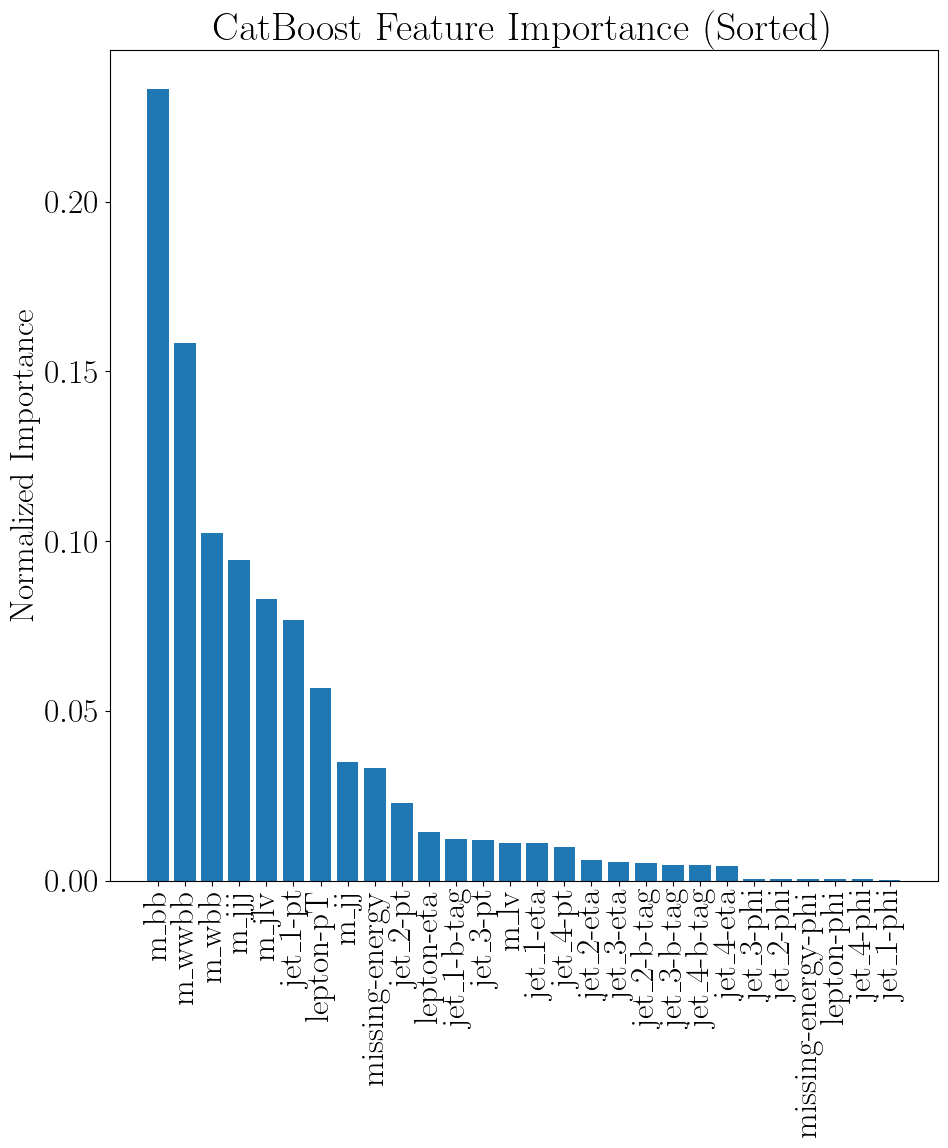

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = cb.get_feature_importance()
normalized = importances / np.sum(importances)

# Zip, sort by importance descending, and unzip
sorted_features = sorted(zip(X_train.columns, normalized), key=lambda x: x[1], reverse=True)
names, importances_sorted = zip(*sorted_features)

# Print
for name, imp in zip(names, importances_sorted):
    print(f"{name:<20} {imp:>10.4f}")

# Plot
fig, ax = plt.subplots(figsize=(10, 12))
plt.bar(names, importances_sorted)
plt.xticks(rotation=90)
plt.ylabel('Normalized Importance')
plt.title('CatBoost Feature Importance (Sorted)')
plt.tight_layout()
plt.show()